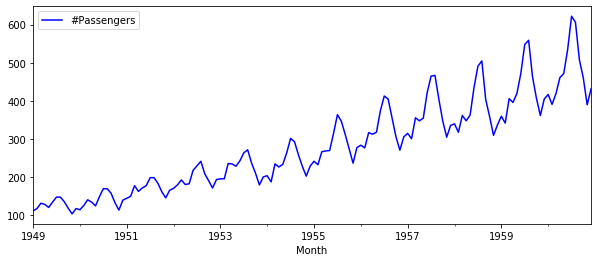

In [13]:
import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def stationarity_check(TS):
    
    from statsmodels.tsa.stattools import adfuller
    
    rolmean = TS.rolling(window =8, center =False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    dftest = adfuller(TS['#Passengers'])
    
    fig = plt.figure(figsize =(20,10))
    orig = plt.plot(TS, color = 'blue', label= 'original')
    mean = plt.plot(rolmean, color = 'red', label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'rolling std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Meam and Standard Deviation')
    plt.show(block = False)
    
    print('The result of the Dickey-Fuller Test:')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key] = value
    print(dfoutput)
    
    return None

data = pd.read_csv('passengers.csv')
ts = data.set_index('Month')
ts.index = pd.to_datetime(ts.index)
ts.plot(figsize = (10,4), color = 'blue')

    

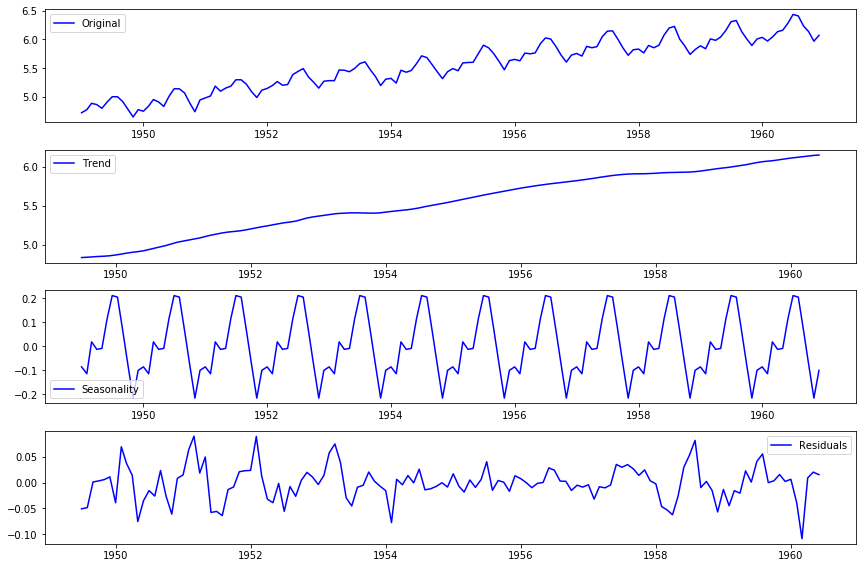

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()


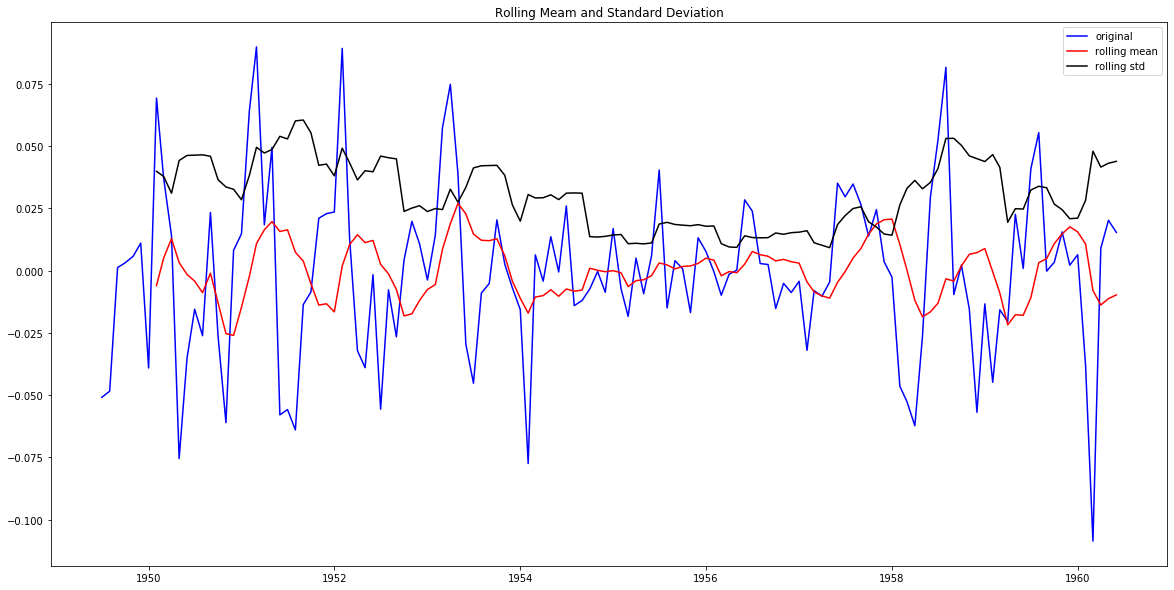

The result of the Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [15]:
#dropping nan values from residuals

ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)

stationarity_check(ts_log_decompose);